<a href="https://colab.research.google.com/github/leo-aguiar/Plano-de-saude/blob/main/Projeto_Final_Bootcamp_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

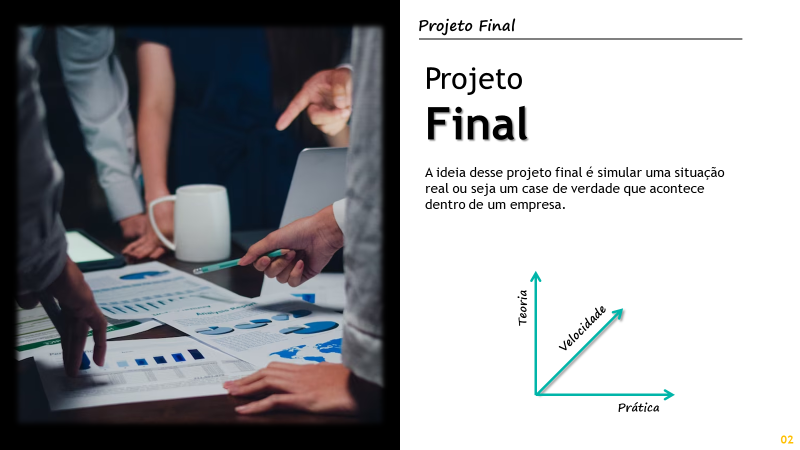

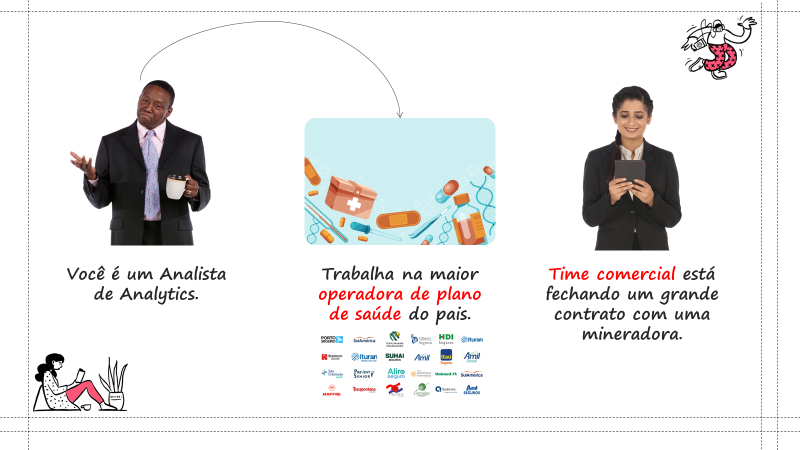

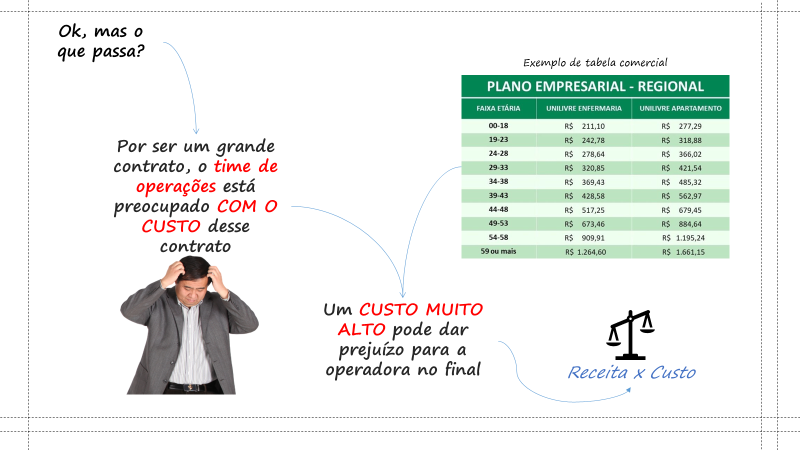

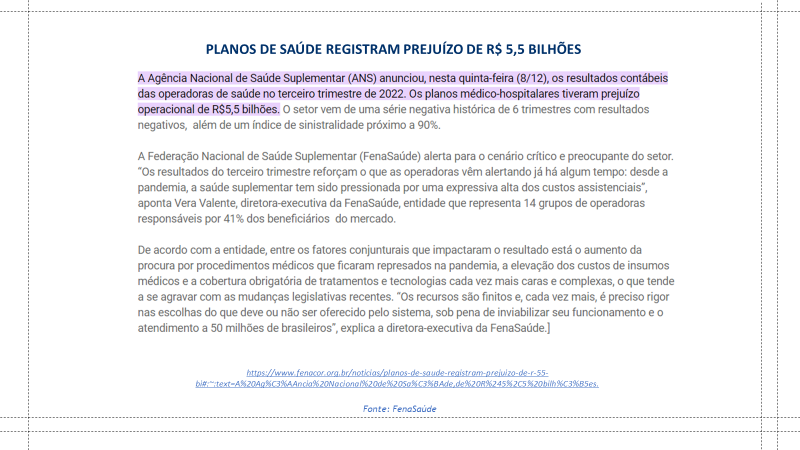

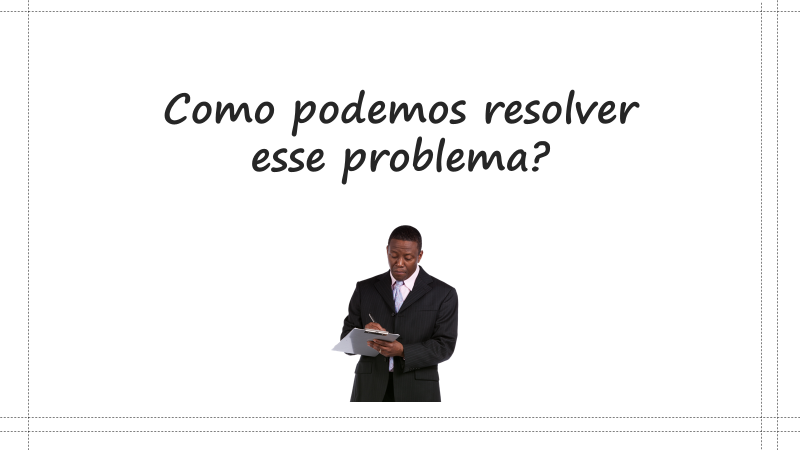

_____

**Resolução**

**Método utilizado para resolver esse case**:


<br>
1° - Treinar um modelo de Machine Learning com os dados de diversos usuários da operadora (Modelo de regressão) e tentar prever quanto será gasto com esse novo negócio.
<br>

<br>
2° - Submeter toda a lista dos novos funcionários e descobrir quanto cada um irá gastar ao longo do ano.
<br>

<br>
OBS: Dessa forma, é possível ser mais preventivo, além de ajudar a área de operações a controlar o orçamento ( custo x receita )
<br>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# ler os dados
Base_Dados = pd.read_csv('Base_Dados_Plano_Saude.csv')

# Verificar
Base_Dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Conhecendo os dados de forma macro**

In [ ]:
# Dimensao
Base_Dados.shape

(1338, 7)

In [ ]:
# Tipos de dados
Base_Dados.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# Geral
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Campos nulos
Base_Dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

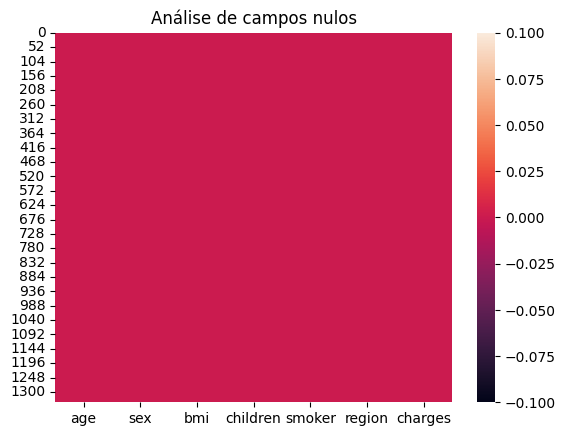

In [ ]:
# Analise Campos nulos
plt.title('Análise de campos nulos')
sns.heatmap( Base_Dados.isnull() );

In [ ]:
# Instalar
!pip install colorama

In [ ]:
from colorama import Style, Fore

print(f'{Style.BRIGHT} {Fore.GREEN} Estatística Descritiva {Style.RESET_ALL}')
Base_Dados.describe( include='all' )

  Estatística Descritiva 


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


**EDA (Análise Exploratória)**

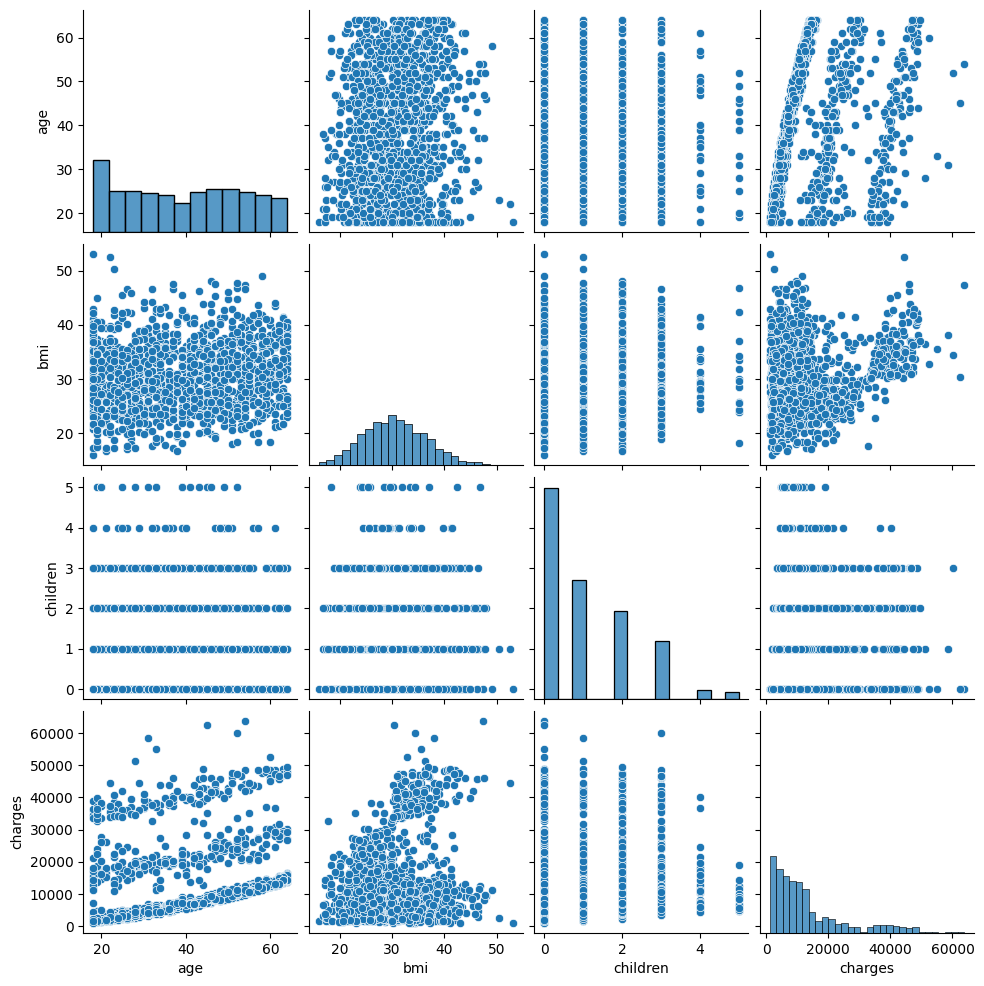

In [ ]:
# Plot Geral
sns.pairplot( Base_Dados );

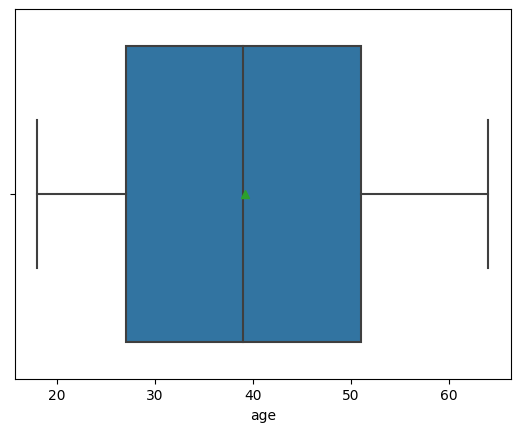

In [ ]:
# Análise da Idade

# Boxplot
sns.boxplot( x=Base_Dados['age'], showmeans=True  );

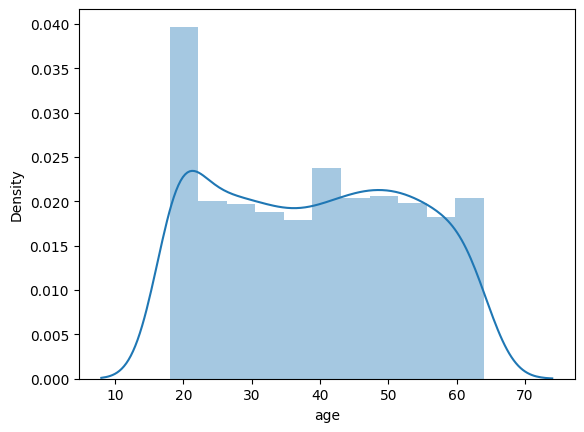

In [ ]:
# histograma
sns.distplot( Base_Dados['age'] );

In [ ]:
# Estatística Descritiva
Base_Dados['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

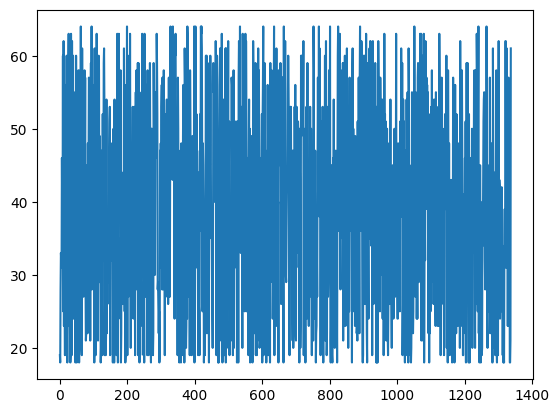

In [ ]:
# Analise da Série
plt.plot( Base_Dados['age'].values );

In [ ]:
# Colunas
Base_Dados.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

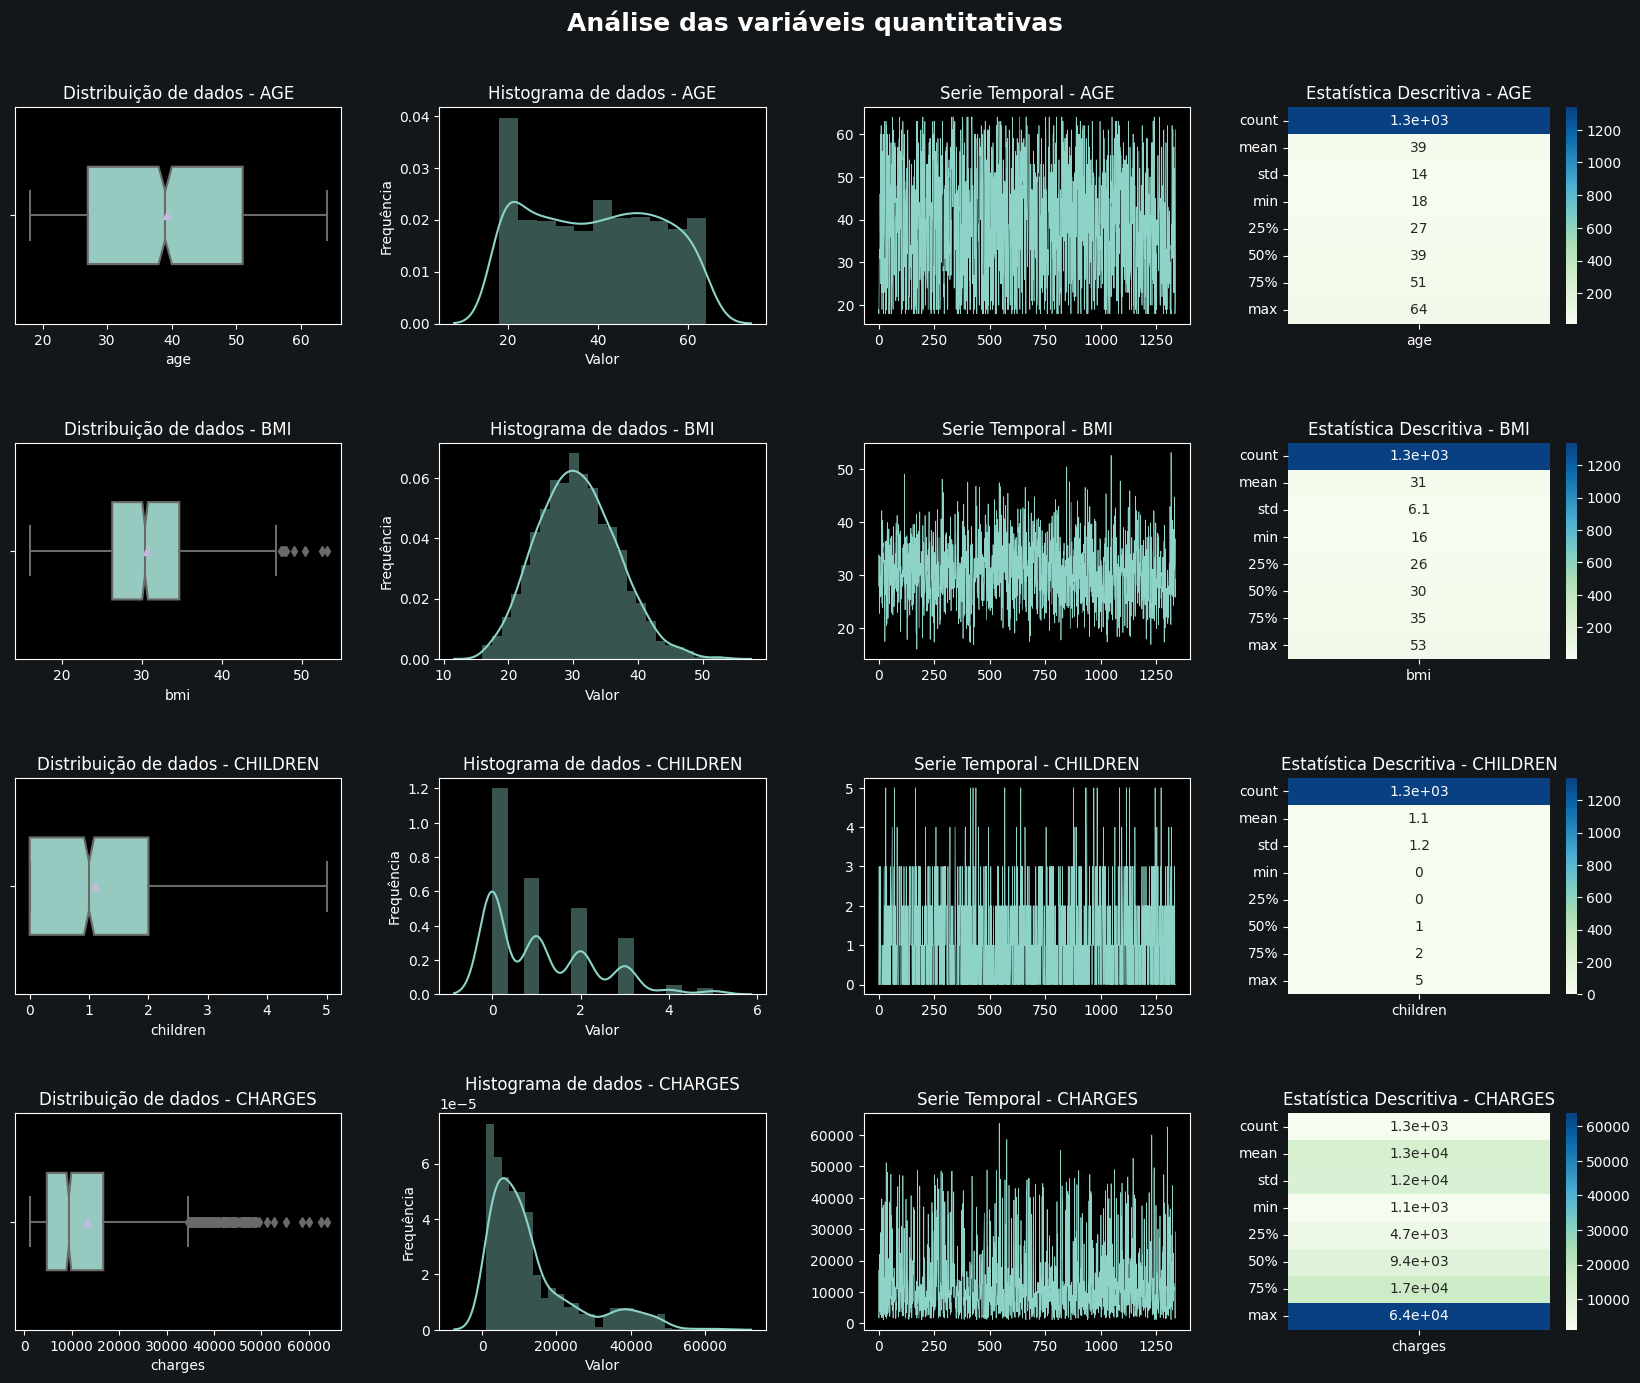

In [ ]:
# Grid de gráficos
Quantidade_Graficos = 4
Colunas = 4
Loop_Repeticao = 1

# Ajuste do relatorio
Figura = plt.figure( figsize=(20, 15) )
Cor_Fundo = "#14171a"
Figura.set_facecolor(Cor_Fundo)

# Estilo
plt.style.use('dark_background')

# Titulo principal
plt.suptitle(f'Análise das variáveis quantitativas', fontsize=18, color='#ffffff', fontweight=600 )

# Loop usando o Index e Nome da coluna
for Index, Coluna in zip( Base_Dados.dtypes.index, Base_Dados.dtypes.values ):

  # Apenas se for numerico
  if Coluna != object:

    # Boxplot
    plt.subplot( Quantidade_Graficos, Colunas, Loop_Repeticao )
    plt.title(f'Distribuição de dados - {Index.upper()}')
    sns.boxplot( x=Base_Dados[Index], width=0.45, notch=True, showmeans=True )
    Loop_Repeticao += 1

    # Distplot
    plt.subplot( Quantidade_Graficos, Colunas, Loop_Repeticao )
    sns.distplot( Base_Dados[Index] )
    plt.title(f'Histograma de dados - {Index.upper()}')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    Loop_Repeticao += 1

    # Serie
    plt.subplot( Quantidade_Graficos, Colunas, Loop_Repeticao )
    plt.title(f'Serie Temporal - {Index.upper()}')
    plt.plot( Base_Dados[Index].values, linewidth=0.5 )
    Loop_Repeticao += 1

    # Estatística
    plt.subplot( Quantidade_Graficos, Colunas, Loop_Repeticao )
    plt.title(f'Estatística Descritiva - {Index.upper()}')
    sns.heatmap( pd.DataFrame( Base_Dados[Index].describe() ), annot=True, cmap="GnBu" )
    Loop_Repeticao += 1

plt.subplots_adjust( left=0.1, bottom=0.1, right=0.9, top=0.915, wspace=0.3, hspace=0.55 );

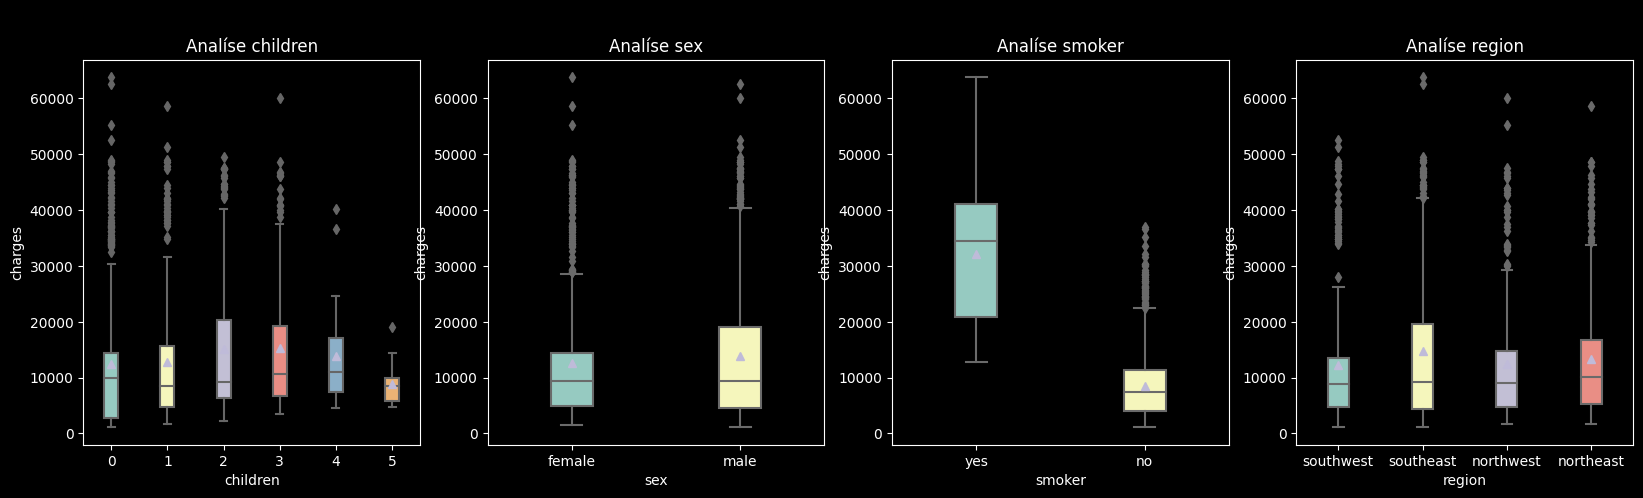

In [ ]:
# Separando as colunas
Dados_Categoricos = Base_Dados[['children', 'sex', 'smoker', 'region', 'charges']]

# Ajuste da Figura
Figura = plt.figure( figsize=(20, 5) )
plt.suptitle(f'Análise categorica', fontsize=18, color='black', fontweight=600 )

# Loop
for Loop, Coluna in enumerate( Dados_Categoricos.columns[0:4] ):

  # Grid, Titulo e Plot
  plt.subplot(1, 4, Loop + 1 )
  plt.title(f'Analíse {Coluna}')
  sns.boxplot( data=Dados_Categoricos, y='charges', x=Coluna, width=0.25, showmeans=True )

# Ajuste layout
plt.subplots_adjust()

Data Prep

In [ ]:
Base_Dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instanciar
le_Sex = LabelEncoder()
le_Smoker = LabelEncoder()
le_Region = LabelEncoder()

# Fitar (Treinar)
le_Sex.fit( Base_Dados.sex.drop_duplicates() )
le_Smoker.fit( Base_Dados.smoker.drop_duplicates() )
le_Region.fit( Base_Dados.region.drop_duplicates() )

# Transformar
Base_Dados.sex = le_Sex.transform( Base_Dados.sex )
Base_Dados.smoker = le_Smoker.transform( Base_Dados.smoker )
Base_Dados.region = le_Region.transform( Base_Dados.region )

Base_Dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
le_Sex.classes_, le_Smoker.classes_, le_Region.classes_

(array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object))

**Correlação**

In [ ]:
Base_Dados.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


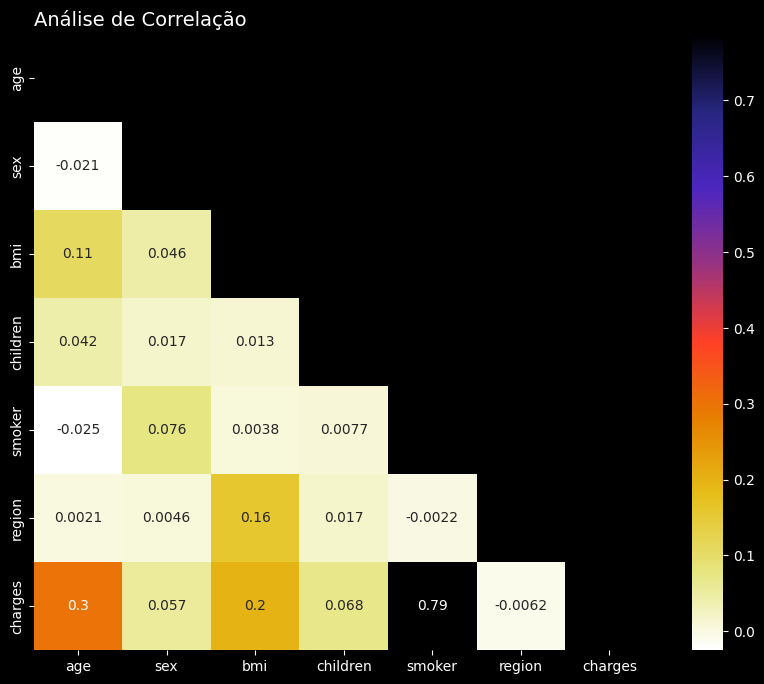

In [ ]:
# Plot
Figura, Eixo = plt.subplots( figsize=(10, 8) )

# Calculando Coor
Correlacao = Base_Dados.corr()

# Gere uma máscara para o triângulo superior
mask = np.zeros_like( Correlacao )
mask[ np.triu_indices_from(mask) ] = True

# Titulo
plt.title('Análise de Correlação', loc='left', fontsize=14)

# Plot
sns.heatmap(
    Correlacao,
    mask=mask,
    cmap='CMRmap_r',
    annot=True,
    );

<Axes: xlabel='age', ylabel='charges'>

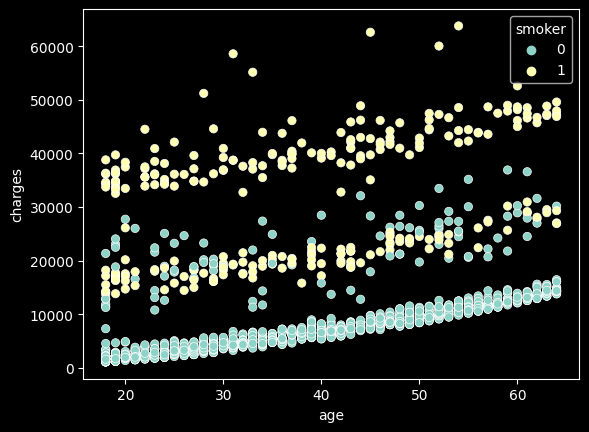

In [ ]:
sns.scatterplot(
    data=Base_Dados,
    x='age',
    y='charges',
    hue='smoker'
)

Análise Geral de Grid

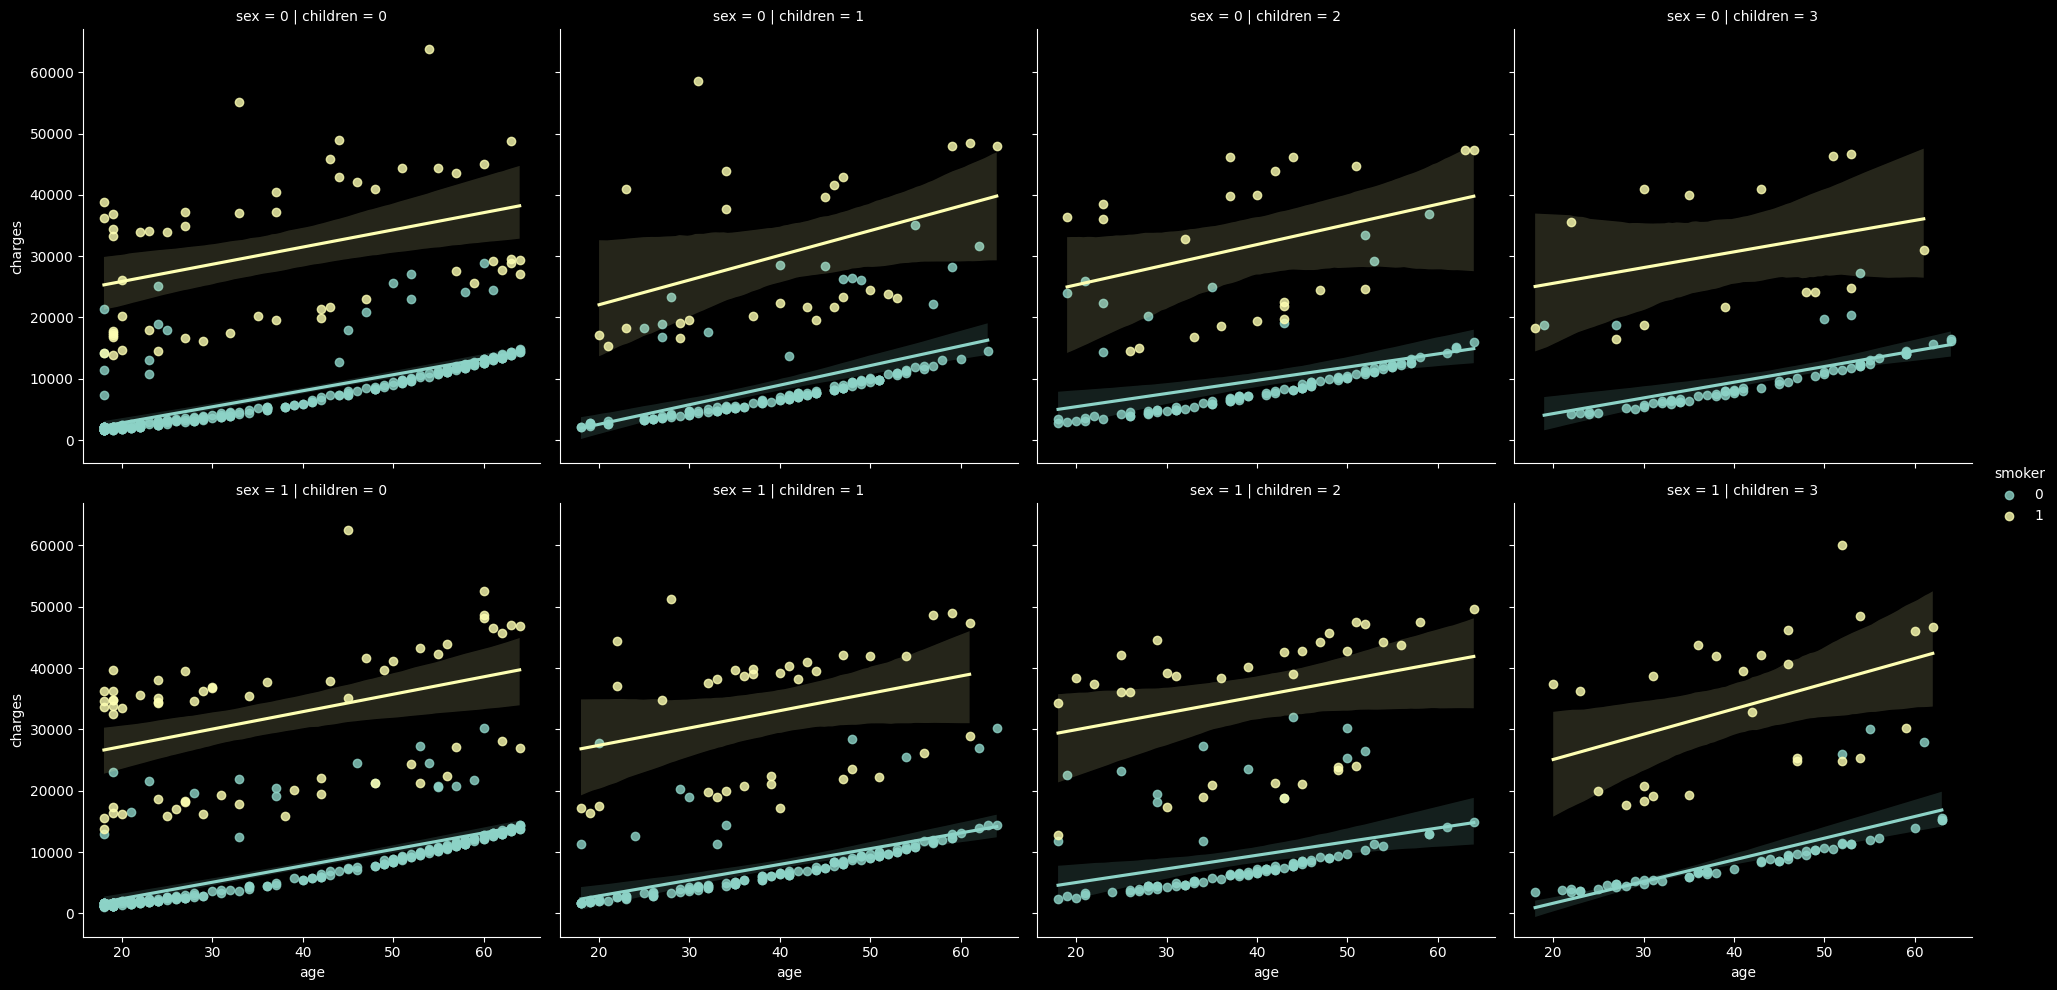

In [ ]:
sns.lmplot(
  data=Base_Dados.loc[ Base_Dados.children <= 3 ] ,
    x='age',
    y='charges',
    hue='smoker',
    row='sex',
    col='children'
)

In [ ]:
# Separar os dados em Eixo_X e Eixo_Y
Eixo_x = Base_Dados.drop( columns=['charges'] )
#Eixo_x = Base_Dados[['age', 'bmi', 'smoker']]
Eixo_y = Base_Dados['charges']

**Teste de Shapiro**

O teste de Shapiro-Wilk é um teste estatístico utilizado para verificar se uma dada amostra de dados segue uma distribuição normal. Ele é amplamente utilizado em análise de dados para avaliar se uma variável contínua pode ser modelada com uma distribuição normal.

Em resumo, o uso do Rank1D com o teste de Shapiro-Wilk é uma técnica comum para avaliar se uma variável pode ser modelada com uma distribuição normal e, portanto, pode ajudar a tomar decisões informadas sobre qual técnica estatística ou modelo utilizar para análise de dados.

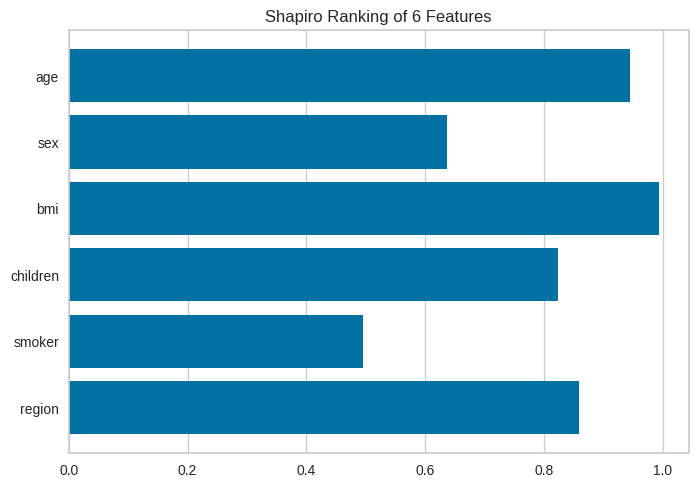

In [ ]:
# Teste estatístico
from yellowbrick.features import Rank1D

# Instanciar
Viz_Shapiro = Rank1D( algorithm='shapiro' )

# Fitar (Treinar)
Viz_Shapiro.fit( Eixo_x, Eixo_y )
Viz_Shapiro.transform( Eixo_x )

# Visualizar
Viz_Shapiro.show();

**Contrução do Modelo**

In [ ]:
# Divisão dos Dados
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    Eixo_x, Eixo_y,
    test_size=0.2,
    random_state = 0 )

len( x_train ), len( x_test )

(1070, 268)

In [ ]:
from sklearn.linear_model import LinearRegression

# Treino do modelo preditivo
Modelo_Linear = LinearRegression()
Modelo_Linear.fit( x_train, y_train )

# Variáveis de caracteristicas
Modelo_Linear.feature_names_in_

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype=object)

In [ ]:
# Previsoes para testar nossa modelo preditivo
Previsoes = Modelo_Linear.predict( x_test )

In [ ]:
Previsoes[0:5]

array([11017.23047857,  9787.53016777, 37994.78211844, 16122.77840727,
        6930.7592301 ])

In [ ]:
y_test[0:5].values

array([ 9724.53   ,  8547.6913 , 45702.02235, 12950.0712 ,  9644.2525 ])

In [ ]:
# Avaliar todas as métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

R2 = Modelo_Linear.score( x_test, y_test )
MAE = mean_absolute_error( y_test, Previsoes )
MSE = mean_squared_error( y_test, Previsoes )
RMSE = mean_squared_error( y_test, Previsoes, squared=False )
MAPE = mean_absolute_percentage_error(y_test, Previsoes) * 100

Dicionario = {
    'R²' : round( R2, 2 ),
    'MAE' : round(MAE, 2),
    'MSE' : round(MSE, 2),
    'RMSE' : round(RMSE, 2),
    'MAPE' : round(MAPE, 2)
}

pd.DataFrame( Dicionario, index=[0] ).transpose().rename( columns={0:'Valor da métrica'} )

,Valor da métrica
R²,0.80
MAE,3930.33
MSE,31845929.13
RMSE,5643.22
MAPE,39.80


In [ ]:
Base_Dados['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [ ]:
# Função validação cruzada
from sklearn.model_selection import cross_val_score

# Instanciar um modelo de Regressão
model = LinearRegression()

# Rodar em partes
Scores = cross_val_score(

    # Algoritmo de Machine Learing
    model,

    # Dados
    Eixo_x,
    Eixo_y,

    # numero de folds - 5 dobras
    cv=5,

    # Métrica de avaliação
    scoring='r2'
)

print(f'{Style.BRIGHT} {Fore.GREEN}Avaliando a validação cruzada {Style.RESET_ALL}')
print( '--' * 25 )

print( f'Cada parte será testada com: {len(Base_Dados) / 5} registros' )
print( '--' * 25 )

print( 'R² em cada dobra:', Scores )
print( '--' * 25 )

print(f'Média final: { round( np.mean(Scores), 2 ) }')

 Avaliando a validação cruzada 
--------------------------------------------------
Cada parte será testada com: 267.6 registros
--------------------------------------------------
R² em cada dobra: [0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
--------------------------------------------------
Média final: 0.75


**Quais parametros passar no 'scoring'**
<br> <br>
'r2': Coeficiente de determinação R²
<br>
'neg_mean_absolute_error': Erro absoluto médio negativo (MAE)
<br>
'neg_mean_squared_error': Erro quadrático médio negativo (MSE)
<br>
'neg_mean_squared_log_error': Erro quadrático médio do log negativo (MSLE)
<br>
'neg_median_absolute_error': Erro absoluto mediano negativo (MedAE)

In [ ]:
# Lendo a Base
Novo_Contrato = pd.read_csv('Base_Dados_Plano_Saude - Novo Contrato.csv', sep=';')
Novo_Contrato.shape

(50, 6)

In [ ]:
# Verificando
Novo_Contrato.head()

,age,sex,bmi,children,smoker,region
0,31,female,2574,0,no,southeast
1,25,male,2622,0,no,northeast
2,23,male,23845,0,no,northeast
3,30,male,353,0,yes,southwest
4,59,female,2772,3,no,southeast


In [ ]:
# Transformar os dados
# Transformar
Novo_Contrato.sex = le_Sex.transform( Novo_Contrato.sex )
Novo_Contrato.smoker = le_Smoker.transform( Novo_Contrato.smoker )
Novo_Contrato.region = le_Region.transform( Novo_Contrato.region )

Novo_Contrato.head()

,age,sex,bmi,children,smoker,region
0,31,0,2574,0,0,2
1,25,1,2622,0,0,0
2,23,1,23845,0,0,0
3,30,1,353,0,1,3
4,59,0,2772,3,0,2


In [ ]:
# Fazendo o predict
Novo_Contrato['Custo_Plano'] =  Modelo_Linear.predict( Novo_Contrato )

Novo_Contrato.head()

,age,sex,bmi,children,smoker,region,Custo_Plano
0,31,0,2574,0,0,2,8.409431e+05
1,25,1,2622,0,0,0,8.557351e+05
2,23,1,23845,0,0,0,7.824916e+06
3,30,1,353,0,1,3,1.345629e+05
4,59,0,2772,3,0,2,9.144098e+05


In [ ]:
Novo_Contrato['Custo_Plano'].values

array([  840943.08254541,   855735.14964116,  7824915.90665624,
         134562.92468276,   914409.76046738,   713854.96947991,
        1098688.79600228,  1151139.47091873,   899076.08921021,
        8512726.88073505,  8640543.45287568,    92000.83128996,
        1356020.02353375,  1010735.19939741,    99865.07809956,
         936696.28336115,   108805.15566646,   119718.05664906,
       10039246.68115048,    97463.8605631 ,   109641.1409286 ,
         111090.04522258,  1122998.73809097,   997434.63358562,
         107906.00928528,   874660.64648181,  1222888.56333336,
        1064681.06113124,   898286.06881851,  1252454.11533702,
          86932.67543925,  1514088.32662656,    85782.44050951,
         120800.77432725,   121179.50259074,    79948.33945989,
         109966.79300726, 10513898.06651555,   696144.12978337,
        1335937.86561691,  1037082.53164306, 10327569.32150892,
         112695.82816502,    77356.85434719,   982501.20183795,
          74504.8340754 ,  1169553.30490